**Importation des packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

**Chargement des données**

In [4]:

df_user_data = pd.read_excel("C:/Users/asus/Desktop/Datasets Cooding-Week/Livrable_code_g_colab/datasets_excel/user1_base.xlsx")

**ANALYSE EXPLORATOIRE DES DONNEES**

---



---




**Observation des premiers enregistrements du data frame df_user_data**

In [5]:
headers = ["userid", "itemid", "rating", "timestamp"]
df_user_data.columns = headers

In [6]:
df_user_data.head()

,userid,itemid,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [7]:
df_user_data.head()

,userid,itemid,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [23]:
df_user_data.describe()

,userid,itemid,rating,timestamp
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
df_user_data.value_counts()

userid  itemid  rating  timestamp
1       1       5       874965758    1
663     521     3       889493467    1
        619     4       889493182    1
        603     4       889493540    1
        597     3       889492917    1
                                    ..
409     207     3       881108715    1
        206     4       881109264    1
        205     3       881107992    1
        204     5       881108496    1
943     1330    3       888692465    1
Length: 80000, dtype: int64

La colonne "timestamp" n'a aucune utilié ici pour le moment
Nous allons la supprimer

In [9]:
df_user_data = df_user_data.drop("timestamp", axis = 1)

In [10]:
df_user_data.head()

,userid,itemid,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


***VISUALISATION DES DONNEES***

---



---



In [11]:
R = np.zeros((943, 1682))
#compteur = 0

#print(compteur)
for i in range(0, 80000):
    n = df_user_data["userid"][i]
    m = df_user_data["itemid"][i]
    c = df_user_data["rating"][i]
    R[n-1][m-1]= c
R

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

 **Carte thermique de la classification des films**

<Axes: >

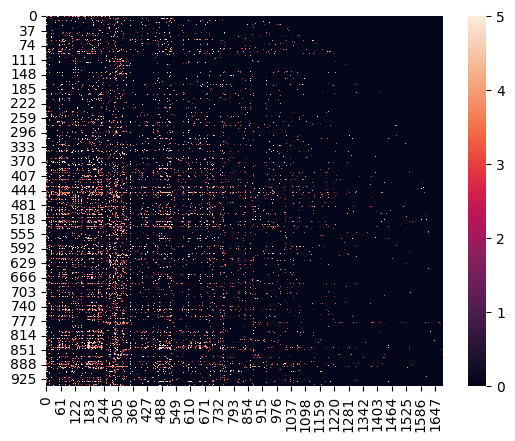

In [12]:
sns.heatmap(R)

**Histogrammes pour les distributions de notes**

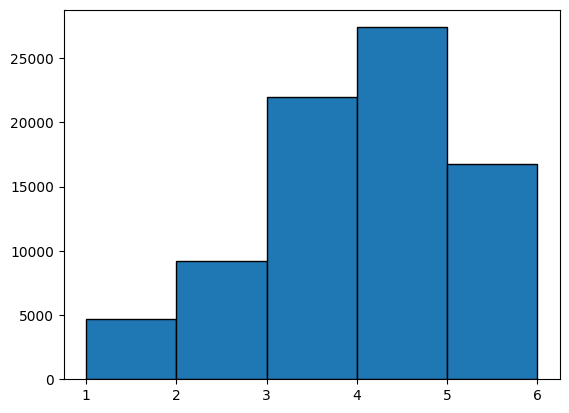

In [13]:
plt.hist(df_user_data["rating"], range(1, 7), edgecolor = "black")
plt.show()

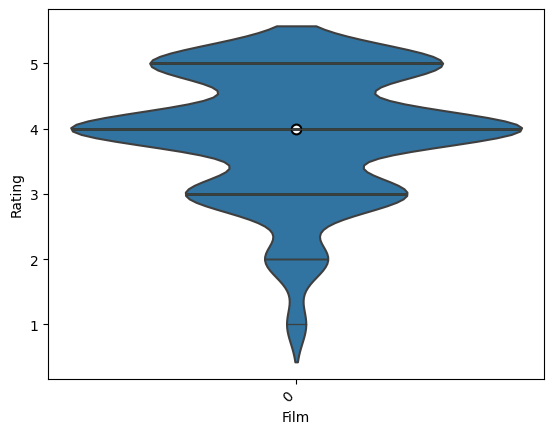

In [14]:

# Tracé du violon pour le film 1

film_id = [i for i in range(1)]


film_ratings = [R[R[:, i] != 0, i] for i in range(1)] # Les listes contenu dans film_rating contiennent la liste des notes attribuées à chaque film par ordre croissant d'identifiant.

medians = [np.median(r) for r in film_ratings] # Calcul de la note mediane pour chaque film

dico = {'Film': np.repeat(film_id, [len(r) for r in film_ratings]),'Rating': [i for r in film_ratings for i in r]}

df = pd.DataFrame({'Film': np.repeat(film_id, [len(r) for r in film_ratings]),'Rating': [i for r in film_ratings for i in r]}) # Création du dataframe faisant correspondre à chaque fim ses différentes notes reçues.

# contruction et affichage du violon (violin)
sns.violinplot(x='Film', y='Rating', data=df, inner='stick')
plt.xticks(rotation=45, ha='right')
plt.scatter(np.arange(len(film_id)), medians, color='white', s=50, edgecolors='black', linewidths=1.5)

plt.show()


In [15]:
df_user_data["itemid2"] = 0
item = [x for x in range(1, 1683)]

In [16]:
x_counts = 0
total = 0
for j in range(0, 1682):
    for i in range(0, 943):
        total += R[i][j]
        if R[i][j] ==0 :
            x_counts+=1

moyenne_mu = total / (943*1682 - x_counts)
moyenne_mu

3.52835

In [17]:
#for i in item :
  #df_user_data = df_user_data.drop("0", axis = 1)
df_user_data.head()

,userid,itemid,rating,itemid2
0,1,1,5,0
1,1,2,3,0
2,1,3,4,0
3,1,4,3,0
4,1,5,3,0


In [35]:
df_user_data["mean_rating"] = 0 
moy_film =[]
for i in range(0, 1682):
    
    somme = 0
    count = 0
    for j in range(0, 943):
        if R[j][i] != 0:
            count += 1
            somme  += R[j][i]
    if count != 0:
        b = (somme / count)
        moy_film.append(b)

    else:
        b = moyenne_mu
        moy_film.append(b)


In [36]:
liste_count = []
vecteur_nombre_occurence = []
for j in range(0, 943):
    
    somme = 0
    count = 0
    for i in range(0, 1642):
        if R[j][i] != 0:
            count += 1
    liste_count.append(count)
liste_count.sort()
#print(liste_count)

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.680e+03, 1.681e+03,
        1.682e+03]),
 <BarContainer object of 1681 artists>)

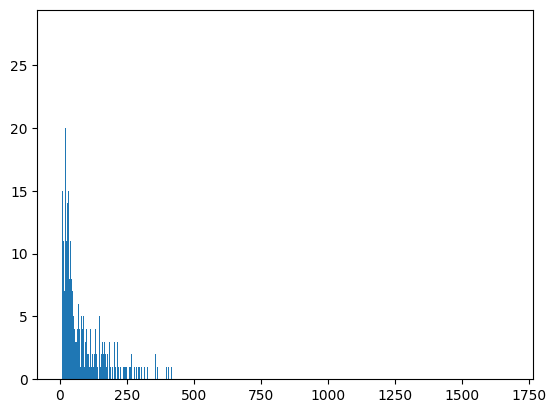

In [37]:
plt.hist(liste_count, range(1, 1683))

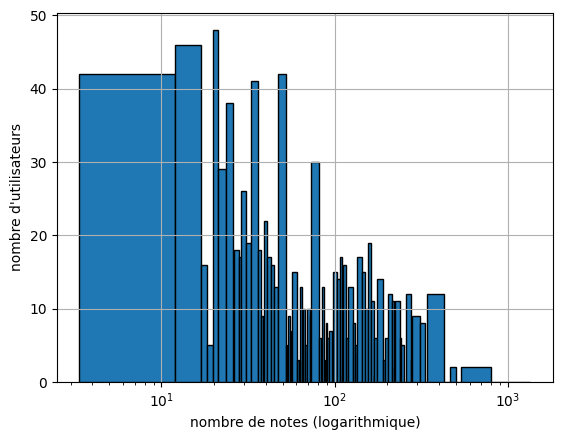

In [42]:
# Données d'exemple
data=[10]
while data[0] > 4 :
  data = np.sort(np.random.lognormal(size=100)*100)

np.random.seed(0)
 

# Création de l'histogramme

plt.hist(liste_count, data, edgecolor = "black")

plt.xscale('log')

plt.xlabel('nombre de notes (logarithmique)')

plt.ylabel("nombre d'utilisateurs")

plt.grid(True)

 

# Affichage de l'histogramme

plt.show()


